# Entangled Qubit Measurements Experiment

For this problem, there are two people, Alice and Bob.  An entangled qubit is created and Alice is given one particle of it, Bob the other remaining particle of the entangled pair.

Since the particles are entangled, when Alice's qubit is in state 0, Bob's qubit will have to be measured in state 1.  If Alice's qubit is measured to be in state 1, then Bob's qubit must be in state 0.

NOTE: This only works if Alice and Bob both measure the same spin axis, the x-axis in this example.  If Alice and Bob measure different axis' then there will be no correlation between there results, both will have a random chance of either spin up or spin down.

In [1]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from numpy.random import randint
import numpy as np

import sys
import warnings

import matplotlib.pyplot as plt

import qiskit
from qiskit import IBMQ, QuantumCircuit, execute,  Aer
from qiskit.result import marginal_counts
from qiskit.providers.ibmq.job import job_monitor
from qiskit.tools.visualization import plot_histogram

print("Imports Successful")


Imports Successful


Below, we create a two qubit system.  We then place Alice's qubit in state 0.  A barrier is between Alice and Bob.  Then, Bob measures his qubit.

In [2]:
qc_simp = QuantumCircuit(2,2)
qc_simp.x(0)
qc_simp.measure([0,1], [0,1])
qc_simp.barrier([0, 1])
qc_simp.measure([0,1], [0,1])

Below is a scematic of this system.

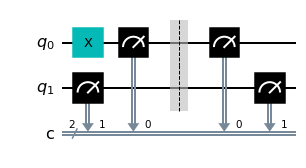

In [3]:
qc_simp.draw(output="mpl")

As can be seen in the histogram below, the system is 100% in the state 01, meaning Alice's qubit is in state 0, and Bob's qubit is in state 1!  This is exactly as expected.

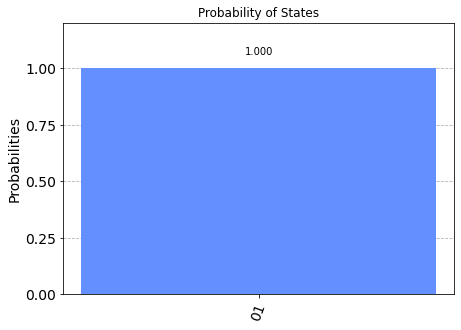

In [4]:
qasm_sim = Aer.get_backend('qasm_simulator')
job = qasm_sim.run(assemble(qc_simp))
plot_histogram(job.result().get_counts(), title = 'Probability of States')

Now, we create another two qubit system.  Alice's qubit is in state 1.  A barrier is between Alice and Bob.  Then, Bob measures his qubit.

In [5]:
qc_simp = QuantumCircuit(2,2)
qc_simp.x(1)
qc_simp.measure([0,1], [0,1])
qc_simp.barrier([0, 1])
qc_simp.measure([0,1], [0,1])

Below is a scematic of this system.

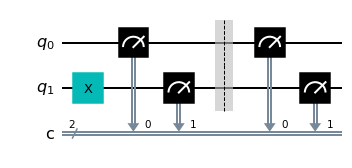

In [6]:
qc_simp.draw(output="mpl")

As can be seen in the histogram below, the system is 100% in the state 10, meaning Alice's qubit is in state 1, and Bob's qubit is in state 0!  This is exactly as expected.

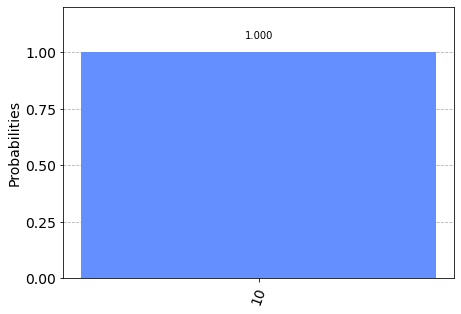

In [7]:
qasm_sim = Aer.get_backend('qasm_simulator')
job = qasm_sim.run(assemble(qc_simp))
plot_histogram(job.result().get_counts())

## References

"Modern Quantum Mechanics", by J.J. Sakurai and Jim Napolitano. Specifically, section 3.10 on "Spin Correlation Measurements and Bell's Inequality" was used.